In [3]:
import torch
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.tensor as tensor 
import math

In [4]:
y, sr = librosa.load('LJ001-0001.wav', mono=True)
text = 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition|Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition'

In [5]:
print("Shape:{}, \n Sampling rate:{}".format(y.reshape(-1, 1), sr))

Shape:[[-7.3242188e-04]
 [-7.6293945e-04]
 [-6.4086914e-04]
 ...
 [ 7.3242188e-04]
 [ 2.1362305e-04]
 [ 6.1035156e-05]], 
 Sampling rate:22050


In [6]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 103.36 beats per minute


In [7]:
# get the mel frequency cepstrum coefficients
hop_length = 512
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)
print(len(mfcc))

13


In [8]:
# get the mel spectrogram itself
S = librosa.feature.melspectrogram(y=y, sr=sr)

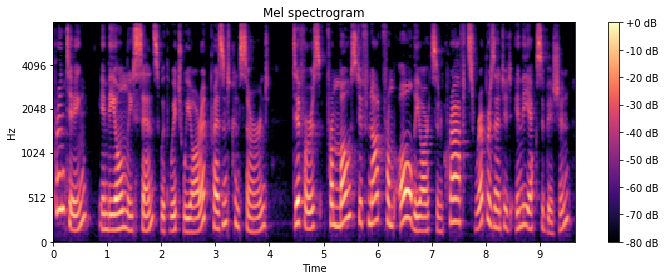

In [9]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [10]:
# Mu_law quantization
n_q= 255
mu = tensor(n_q, dtype = torch.float)
audio = torch.abs(torch.tensor(y))
#audio_abs = torch.min(torch.abs(audio), 1.0)
mag = torch.log1p(mu*audio) / torch.log1p(mu)
signal = torch.sign(audio) * mag
out = ((signal + 1)/2 * mu + 0.5).int()
print("Quantization number: {} \nMax: {}, Min: {}".format(n_q, max(out), min(out))) 

Quantization number: 255 
Max: 252, Min: 128


In [11]:
in_size = 5 #size of input
piece = out.narrow(0, 0, in_size) # Get the first 50 values
print("Size of cut: {}, input size: {}".format(in_size, piece.size()[0]))
piece = piece.reshape(1,1, in_size).float() # conv input should be float tensor

Size of cut: 5, input size: 5


In [12]:
d = 1 #dilation
kernel = 2
pad = ((float)(kernel-1))*d//2;
#pad = math.ceil((in_size%d)/2);
print("Padding:{}".format(pad))
layer1= torch.nn.Conv1d(1, 1, kernel, dilation = d, padding = pad) # (inchannels, outchannels, kernelsize)
out = layer1(piece)
print("Input size: {} Output size: {}".format(piece.size(),out.size()))

Padding:0.0
Input size: torch.Size([1, 1, 5]) Output size: torch.Size([1, 1, 4])


In [13]:
input = torch.tensor([1, 2, 3, 4, 5], dtype = torch.float)
input = input.reshape(1,1,5)
print(input)

tensor([[[ 1.,  2.,  3.,  4.,  5.]]])


In [14]:
print(layer1)

Conv1d(1, 1, kernel_size=(2,), stride=(1,))
